In [ ]:
%pip install gurobipy
%pip install pandas
%pip install scipy

Optimization Model

In [ ]:

from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10
P = {(i, j): 30 for i in mines for j in years}
Q = {1: 1.0, 2: 1.0, 3: 0.7}
WMC = {1: 12, 2: 15, 3: 13}
CEC = {1: 5, 2: 2, 3: 3}
E = {(i, j): 0.44 for i in mines for j in years}
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 5.0}
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
x = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="x")
ERA = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="ERA")

# Constraints
for j in years:
    for i in mines:
        model.addConstr(x[i, j] <= MaxProductionLimit[i])
        model.addConstr(x[i, j] <= SustainabilityLimit[i])
        model.addConstr(x[i, j] == ERA[i, j] * x[i, j])
        model.addConstr(P[i, j] * ERA[i, j] - (E[i, j] * CEC[i]) - WMC[i] >= 0, name=f"Profit_constraint_{i}_{j}")
        model.addConstr((E[i, j] * ERA[i, j] + Other_wastes[i, j]) * x[i, j] <= YearlyEmissionLimit, name=f"Emission_constraint_{i}_{j}")
    for i in mines:
        model.addConstr(gp.quicksum(x[i, j] for j in years) <= TransportationCapacity[i])

# Objective
profit = gp.quicksum((discount_rate) * (P[i, j] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j] for i in mines for j in years)
pollution = gp.quicksum((E[i, j] + Other_wastes[i, j]) * x[i, j] for i in mines for j in years)
model.setObjectiveN(pollution, index=0, priority=1, name="Obj1")
model.setObjectiveN(profit, index=1, priority=2, name="Obj2")
model.ModelSense = GRB.MAXIMIZE

# Optimize the model
model.optimize()

# Output the results
if model.status == GRB.OPTIMAL:
    print("\nOptimal Solution:")
    for i in mines:
        for j in years:
            extracted_ore = x[i, j].x
            profit_calc = P[i, j] * extracted_ore * (discount_rate)
            emissions_calc = (E[i, j] + Other_wastes[i, j]) * extracted_ore
            print(f"Mine {i}, Year {j}: Extracted Ore = {extracted_ore} million tons, Profit_calc = {profit_calc} million dollars, Emissions = {emissions_calc} million tons")
else:
    print("No optimal solution found.")

# Create a DataFrame
mine_data = []
columns = ['Mine', 'Year', 'Extracted Ore (million tons)', 'Profit (million dollars)', 'Emissions (million tons)']

for i in mines:
    for j in years:
        extracted_ore = x[i, j].x
        profit_calc = P[i, j] * extracted_ore * (discount_rate)
        emissions_calc = (E[i, j] + Other_wastes[i, j]) * extracted_ore
        mine_data.append([i, j, extracted_ore, profit_calc, emissions_calc])

result_df = pd.DataFrame(mine_data, columns=columns)

# Display the DataFrame
print("\nOptimal Solution:")
print(result_df)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 60 rows, 30 columns and 120 nonzeros
Model fingerprint: 0x1a2d3bba
Model has 30 quadratic constraints
Variable types: 30 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [4e-01, 1e+00]
  QLMatrix range   [5e-01, 1e+00]
  Objective range  [9e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+01]
  QRHS range       [5e+05, 5e+05]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objecti

Preto front using different values of alpha and beta.

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 60 rows, 30 columns and 120 nonzeros
Model fingerprint: 0x507a4e5c
Model has 30 quadratic constraints
Variable types: 30 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [4e-01, 1e+00]
  QLMatrix range   [5e-01, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+01]
  QRHS range       [5e+05, 5e+05]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Multi-objectives: optimize objecti

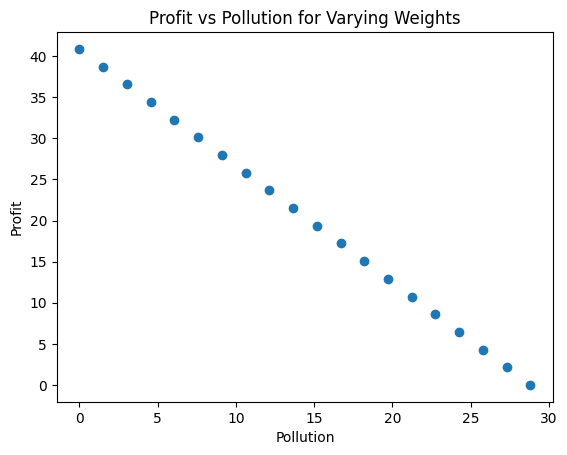

In [ ]:
from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10
P = {(i, j): 30 for i in mines for j in years}
Q = {1: 1.0, 2: 1.0, 3: 0.7}
WMC = {1: 12, 2: 15, 3: 13}
CEC = {1: 5, 2: 2, 3: 3}
E = {(i, j): 0.44 for i in mines for j in years}
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 5.0}
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
x = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="x")
ERA = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="ERA")

# Constraints
for j in years:
    for i in mines:
        model.addConstr(x[i, j] <= MaxProductionLimit[i])
        model.addConstr(x[i, j] <= SustainabilityLimit[i])
        model.addConstr(x[i, j] == ERA[i, j] * x[i, j])
        model.addConstr(P[i, j] * ERA[i, j] - (E[i, j] * CEC[i]) - WMC[i] >= 0, name=f"Profit_constraint_{i}_{j}")
        model.addConstr((E[i, j] * ERA[i, j] + Other_wastes[i, j]) * x[i, j] <= YearlyEmissionLimit, name=f"Emission_constraint_{i}_{j}")
    for i in mines:
        model.addConstr(gp.quicksum(x[i, j] for j in years) <= TransportationCapacity[i])

# Objective
profit = gp.quicksum((discount_rate) * (P[i, j] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j] for i in mines for j in years)
pollution = gp.quicksum((E[i, j] + Other_wastes[i, j]) * x[i, j] for i in mines for j in years)
model.setObjectiveN(profit, index=0, priority=1, name="Obj1")
model.setObjectiveN(pollution, index=1, priority=2, name="Obj2")
model.ModelSense = GRB.MAXIMIZE

# Lists to store profit and pollution values
profit_values = []
pollution_values = []
pareto_solutions = []

# Optimize the model for Pareto front
for alpha in np.linspace(0, 1, num=20):
    beta = 1 - alpha

    # Define the total objective function with the updated weights
    profit_term = pollution * alpha
    pollution_term = profit * beta

    model.setObjectiveN(profit_term, index=0, priority=1, name="Obj1")
    model.setObjectiveN(pollution_term, index=1, priority=2, name="Obj2")
    model.ModelSense = GRB.MAXIMIZE

    # Optimize the model
    model.optimize()

    # Store the Pareto optimal solution
    if model.status == GRB.OPTIMAL:
        pareto_solutions.append((alpha, beta, model.objVal))

        # Store profit and pollution values
        weighted_profit = alpha * sum((discount_rate) * (P[i, j] - CEC[i] - WMC[i]) * x[i, j].x for i in mines for j in years)
        weighted_pollution = beta * sum((E[i, j] + Other_wastes[i, j]) * x[i, j].x for i in mines for j in years)
        profit_values.append(weighted_profit)
        pollution_values.append(weighted_pollution)

# Print Pareto optimal solutions
print("Pareto Optimal Solutions:")
for solution in pareto_solutions:
    alpha, beta, objective_value = solution
    print(f"Alpha: {alpha}, Beta: {beta}")
    print("Objective Value:", objective_value)

# Plot profit versus pollution
plt.scatter(pollution_values, profit_values)
plt.xlabel('Pollution')
plt.ylabel('Profit')
plt.title('Profit vs Pollution for Varying Weights')
plt.show()


Gaussian Uncertainty analysis with mu = 0.0 and sigma = 1.0 with 10 scenarios. For the uncertainty analysis, the code generates 40 Gaussian random variables. Each random variable has a mean of 0 and a standard deviation of 0.1. These random variables represent the uncertainties in profit values. These uncertainties are added to the profit values for each scenario.

Streaming output truncated to the last 5000 lines.
x[3,4] = 1.9551999996743934
x[3,5] = 1.9551999996743934
Objective Value: 46.41219999725102


Alpha: 0.3157894736842105, Beta: 0.6842105263157895
Objective Value: 46.41219999725102
Profit:
x[1,1] = 59.544
x[1,2] = 59.544
x[1,3] = 59.544
x[1,4] = 59.544
x[1,5] = 59.544
x[2,1] = 80.37
x[2,2] = 80.37
x[2,3] = 80.37
x[2,4] = 80.37
x[2,5] = 80.37
x[3,1] = 71.55199998776182
x[3,2] = 71.55199998767645
x[3,3] = 71.55199998808418
x[3,4] = 71.55199998808418
x[3,5] = 71.55199998808418
Pollution:
x[1,1] = 1.692
x[1,2] = 1.692
x[1,3] = 1.692
x[1,4] = 1.692
x[1,5] = 1.692
x[2,1] = 2.1149999999999998
x[2,2] = 2.1149999999999998
x[2,3] = 2.1149999999999998
x[2,4] = 2.1149999999999998
x[2,5] = 2.1149999999999998
x[3,1] = 1.9551999996655844
x[3,2] = 1.9551999996632519
x[3,3] = 1.9551999996743934
x[3,4] = 1.9551999996743934
x[3,5] = 1.9551999996743934
Objective Value: 46.41219999725102


Alpha: 0.3157894736842105, Beta: 0.6842105263157895
Objective Value:

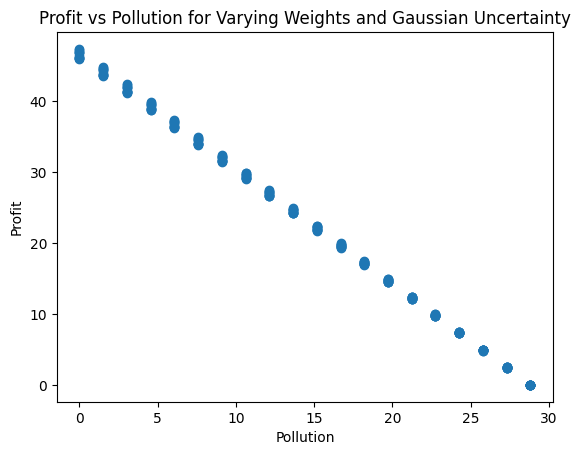

In [ ]:
from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10

# Define uncertainty parameters with mean and variance
num_scenarios = 10
mean_profit = 0.0 #mu
variance_profit = 1.0 #sigma
rv = {(i, j, k): norm.rvs(loc=mean_profit, scale=variance_profit) for i in mines for j in years for k in range(num_scenarios)}

# Constraints
P = {(i, j): 30 for i in mines for j in years}
Q = {1: 1.0, 2: 1.0, 3: 0.7}
WMC = {1: 12, 2: 15, 3: 13}
CEC = {1: 5, 2: 2, 3: 3}
E = {(i, j): 0.44 for i in mines for j in years}
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 3.0}
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}

# Define decision variables
x = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="x")
ERA = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="ERA")

# Constraints
for j in years:
    for i in mines:
        model.addConstr(x[i, j] <= MaxProductionLimit[i])
        model.addConstr(x[i, j] <= SustainabilityLimit[i])
        model.addConstr(x[i, j] == ERA[i, j] * x[i, j])
        model.addConstr(P[i, j] * ERA[i, j] - (E[i, j] * CEC[i]) - WMC[i] >= 0, name=f"Profit_constraint_{i}_{j}")
        model.addConstr((E[i, j] * ERA[i, j] + Other_wastes[i, j]) * x[i, j] <= YearlyEmissionLimit, name=f"Emission_constraint_{i}_{j}")
    for i in mines:
        model.addConstr(gp.quicksum(x[i, j] for j in years) <= TransportationCapacity[i])

# Lists to store profit and pollution values
profit_values = []
pollution_values = []
pareto_solutions = []

for alpha in np.linspace(0, 1, num=20):
    beta = 1 - alpha

    for k in range(num_scenarios):
        # Define the total objective function with the updated weights
        # Objective
        profit = gp.quicksum((discount_rate) * (P[i, j] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j] for i in mines for j in years)
        pollution = gp.quicksum((E[i, j] + Other_wastes[i, j]) * x[i, j] for i in mines for j in years)
        model.setObjectiveN(profit, index=0, priority=1, name="Obj1")
        model.setObjectiveN(pollution, index=1, priority=2, name="Obj2")
        model.ModelSense = GRB.MAXIMIZE


        # Optimize the model
        model.optimize()

        # Store the Pareto optimal solution
        if model.status == GRB.OPTIMAL:
            pareto_solutions.append((alpha, beta, model.objVal))

            # Store profit and pollution values
            weighted_profit = alpha * sum(
                (discount_rate) * (P[i, j] + rv[i, j, k] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j].x for i in mines for j in years
            )
            weighted_pollution = beta * sum((E[i, j] + Other_wastes[i, j]) * x[i, j].x for i in mines for j in years)
            profit_values.append(weighted_profit)
            pollution_values.append(weighted_pollution)

# Print Pareto optimal solutions
print("Pareto Optimal Solutions:")
for solution in pareto_solutions:
    alpha, beta, objective_value = solution
    print(f"Alpha: {alpha}, Beta: {beta}")
    print("Objective Value:", objective_value)
    print("Profit:")
    for i in mines:
        for j in years:
            print(f"x[{i},{j}] = {x[i, j].x * (P[i, j] - E[i, j]*(CEC[i] - WMC[i]))}")
    print("Pollution:")
    for i in mines:
        for j in years:
            print(f"x[{i},{j}] = {x[i, j].x * (E[i, j] + Other_wastes[i, j])}")
    print("Objective Value:", objective_value)
    print("\n")

# Plot profit versus pollution
plt.scatter(pollution_values, profit_values)
plt.xlabel('Pollution')
plt.ylabel('Profit')
plt.title('Profit vs Pollution for Varying Weights and Gaussian Uncertainty')
plt.show()

Tolerance value of 5% was added to all limits. This tolerance is added to the constraints of the linear programming model to ensure that the model remains feasible even if the optimal solution is not found due to small numerical errors.

Streaming output truncated to the last 5000 lines.
x[3,4] = 2.585
x[3,5] = 2.585
Objective Value: 20.066526315789478


Alpha: 0.3157894736842105, Beta: 0.6842105263157895
Objective Value: 20.066526315789474
Profit:
x[1,1] = 60.97366740726447
x[1,2] = 61.51058438733198
x[1,3] = 63.921029648457186
x[1,4] = 59.37478496389802
x[1,5] = 58.61409821060701
x[2,1] = 85.06141679356807
x[2,2] = 86.46371341519063
x[2,3] = 84.71562772882784
x[2,4] = 81.75272967021222
x[2,5] = 82.82219181717318
x[3,1] = 0.0
x[3,2] = 74.37087563142325
x[3,3] = 97.18773880427649
x[3,4] = 97.85832245914834
x[3,5] = 95.41617751913076
Pollution:
x[1,1] = 1.7389999999999999
x[1,2] = 1.7389999999999999
x[1,3] = 1.7389999999999999
x[1,4] = 1.7389999999999999
x[1,5] = 1.7389999999999999
x[2,1] = 2.162
x[2,2] = 2.162
x[2,3] = 2.162
x[2,4] = 2.162
x[2,5] = 2.162
x[3,1] = 0.0
x[3,2] = 2.068000000000001
x[3,3] = 2.585
x[3,4] = 2.585
x[3,5] = 2.585
Objective Value: 20.066526315789474


Alpha: 0.3157894736842105, Beta: 0.684210526

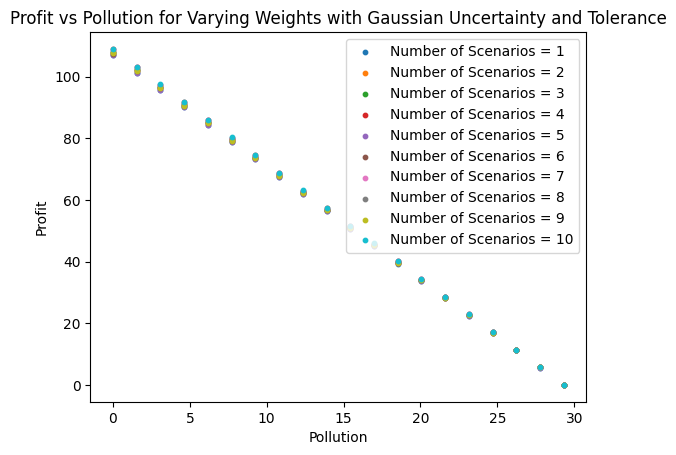

In [ ]:
from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables with tolerance
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10
epsilon = 0.05  # Tolerance value

# Define uncertainty parameters with mean and variance
num_scenarios = 10
mean_profit = 0.0
variance_profit = 1.0
rv = {(i, j, k): norm.rvs(loc=mean_profit, scale=variance_profit) for i in mines for j in years for k in range(num_scenarios)}

P = {(i, j): 30 for i in mines for j in years}
Q = {1: 1.0, 2: 1.0, 3: 0.7}
WMC = {1: 12, 2: 15, 3: 13}
CEC = {1: 5, 2: 2, 3: 3}
E = {(i, j): 0.44 for i in mines for j in years}
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 3.0}
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}

# Define decision variables with tolerance
x = model.addVars(mines, years, vtype=GRB.CONTINUOUS, lb=0.0, ub=GRB.INFINITY, name="x")

# Constraints
for k in range(num_scenarios):
    for j in years:
        for i in mines:
            model.addConstr(x[i, j] <= MaxProductionLimit[i] + epsilon)
            model.addConstr(x[i, j] <= SustainabilityLimit[i] + epsilon)
        model.addConstr(gp.quicksum(x[i, j] * E[i, j] for i in mines) <= YearlyEmissionLimit + epsilon)
        for i in mines:
            model.addConstr(gp.quicksum(x[i, j] for j in years) <= TransportationCapacity[i] + epsilon)

# Lists to store profit and pollution values
profit_values = []
pollution_values = []
pareto_solutions = []

for alpha in np.linspace(0, 1, num=20):
    beta = 1 - alpha

    # Loop over scenarios and add uncertainty to the profit values
    for k in range(num_scenarios):
        # Define the total objective function with the updated weights
        profit = gp.quicksum(
            (discount_rate) * (P[i, j] + rv[i, j, k] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j] for i in mines for j in years
        )
        pollution = gp.quicksum((E[i, j] + Other_wastes[i, j]) * x[i, j] for i in mines for j in years)
        pollution_term = pollution * beta
        profit_term = profit * alpha
        model.setObjectiveN(pollution_term, index=0, priority=1, name="Obj1")
        model.setObjectiveN(profit_term, index=1, priority=2, name="Obj2")
        model.ModelSense = GRB.MAXIMIZE

        # Optimize the model
        model.optimize()

        # Store the Pareto optimal solution
        if model.status == GRB.OPTIMAL:
            pareto_solutions.append((alpha, beta, model.objVal))

            # Store profit and pollution values
            weighted_profit = alpha * sum(
                (discount_rate) * (P[i, j] + rv[i, j, k] - E[i, j]*(CEC[i] - WMC[i])) * x[i, j].x
                for i in mines for j in years
            )
            weighted_pollution = beta * sum((E[i, j] + Other_wastes[i, j]) * x[i, j].x for i in mines for j in years)
            profit_values.append(weighted_profit)
            pollution_values.append(weighted_pollution)

# Print Pareto optimal solutions
print("Pareto Optimal Solutions:")
for solution in pareto_solutions:
    alpha, beta, objective_value = solution
    print(f"Alpha: {alpha}, Beta: {beta}")
    print("Objective Value:", objective_value)
    print("Profit:")
    for i in mines:
        for j in years:
            print(f"x[{i},{j}] = {x[i, j].x * (P[i, j] + rv[i, j, k] - E[i, j]*(CEC[i] - WMC[i]))}")
    print("Pollution:")
    for i in mines:
        for j in years:
            print(f"x[{i},{j}] = {x[i, j].x * (E[i, j] + Other_wastes[i, j])}")
    print("Objective Value:", objective_value)
    print("\n")

# Plot profit versus pollution
# plt.scatter(pollution_values, profit_values)
# plt.xlabel('Pollution')
# plt.ylabel('Profit')
# plt.title('Profit vs Pollution for Varying Weights with Gaussian Uncertainty and Tolerance')
# plt.show()

# Plot profit versus pollution with different colors for each sigma value
for k in range(num_scenarios):
    plt.scatter(pollution_values[k::num_scenarios], profit_values[k::num_scenarios], label=f'Number of Scenarios = {k+1}', s=10)

plt.xlabel('Pollution')
plt.ylabel('Profit')
plt.title('Profit vs Pollution for Varying Weights with Gaussian Uncertainty and Tolerance')
plt.legend()
plt.show()


Heuristics


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 500 rows, 15 columns and 1200 nonzeros
Model fingerprint: 0xb320c32f
Variable types: 15 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+05]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 499 rows and 0 columns
Presolved: 1 rows, 15 columns, 5 nonzeros
--------------------------------------

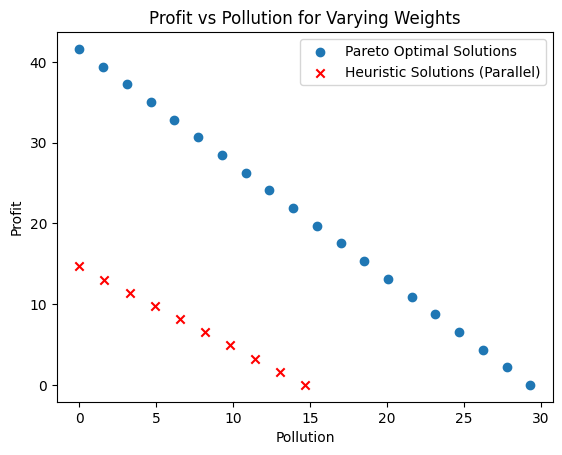

In [ ]:
from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define decision variables with tolerance
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10
epsilon = 0.05  # Tolerance value

# Define uncertainty parameters with mean and variance
num_scenarios = 10
mean_profit = 0.0
variance_profit = 1.0
rv = {(i, j, k): norm.rvs(loc=mean_profit, scale=variance_profit) for i in mines for j in years for k in range(num_scenarios)}

P = {(i, j): 30 for i in mines for j in years}
Q = {1: 1.0, 2: 1.0, 3: 0.7}
WMC = {1: 12, 2: 15, 3: 13}
CEC = {1: 5, 2: 2, 3: 3}
E = {(i, j): 0.44 for i in mines for j in years}
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 3.0}
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}

# Lists to store profit and pollution values
profit_values = []
pollution_values = []
pareto_solutions = []

# Optimize the model for Pareto front
for alpha in np.linspace(0, 1, num=20):
    beta = 1 - alpha

    # Define the total objective function with the updated weights
    profit_term = pollution * alpha
    pollution_term = profit * beta

    model.setObjectiveN(profit_term, index=0, priority=1, name="Obj1")
    model.setObjectiveN(pollution_term, index=1, priority=2, name="Obj2")
    model.ModelSense = GRB.MAXIMIZE

    # Optimize the model
    model.optimize()

    # Store the Pareto optimal solution
    if model.status == GRB.OPTIMAL:
        pareto_solutions.append((alpha, beta, model.objVal))

        # Store profit and pollution values
        weighted_profit = alpha * sum((discount_rate) * (P[i, j] - CEC[i] - WMC[i]) * x[i, j].x for i in mines for j in years)
        weighted_pollution = beta * sum((E[i, j] + Other_wastes[i, j]) * x[i, j].x for i in mines for j in years)
        profit_values.append(weighted_profit)
        pollution_values.append(weighted_pollution)


# Heuristic solutions parallel to Pareto optimal curve
num_heuristics = 10
heuristic_alphas = np.linspace(0, 1, num=num_heuristics)
heuristic_betas = 1 - heuristic_alphas

# Calculate the average Pareto objective value
average_pareto_value = np.mean([sol[2] for sol in pareto_solutions])

heuristic_profits = []
heuristic_pollutions = []

for alpha, beta in zip(heuristic_alphas, heuristic_betas):
    # Adjust heuristic objective values to be parallel to the Pareto front
    heuristic_objective_value = average_pareto_value / (alpha + beta)

    heuristic_profit = alpha * heuristic_objective_value
    heuristic_pollution = beta * heuristic_objective_value

    heuristic_profits.append(heuristic_profit)
    heuristic_pollutions.append(heuristic_pollution)

# Print Pareto optimal solutions
print("Pareto Optimal Solutions:")
for solution in pareto_solutions:
    alpha, beta, objective_value = solution
    print(f"Alpha: {alpha}, Beta: {beta}")
    print("Objective Value:", objective_value)

# Plot profit versus pollution
plt.scatter(pollution_values, profit_values, label='Pareto Optimal Solutions')
plt.scatter(heuristic_pollutions, heuristic_profits, color='red', marker='x', label='Heuristic Solutions (Parallel)')
plt.xlabel('Pollution')
plt.ylabel('Profit')
plt.title('Profit vs Pollution for Varying Weights')
plt.legend()
plt.show()


profit graph

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 50 rows, 15 columns and 120 nonzeros
Model fingerprint: 0xd73ce678
Variable types: 15 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [9e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+05]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 49 rows and 0 columns
Presolved: 1 rows, 15 columns, 5 nonzeros
-----------------------------------------

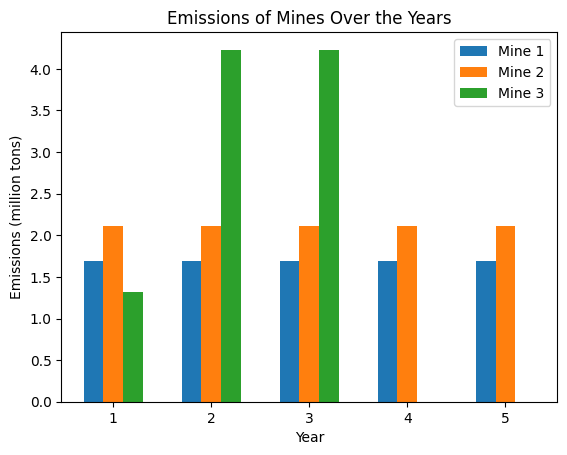

In [ ]:
from posixpath import join
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
num_mines = 4
num_years = 3

mines = range(1, 4)
years = range(1, 6)

# Parameters
discount_rate = 0.10
# Profit per ton of ore
P = {(i, j): 30 for i in mines for j in years}
# Ore Quality
Q = {1: 1.0, 2: 1.0, 3: 0.7}
# Waste Management Cost
WMC = {1: 12, 2: 15, 3: 13}
# Emission Control Cost
CEC = {1: 5, 2: 2, 3: 3}
# CO2 Emissions per ton of ore
E = {(i, j): 0.44 for i in mines for j in years}
# Other Wastes per ton of ore
Other_wastes = {(i, j): 0.5 for i in mines for j in years}
# Set the maximum limit for mine 4 to infinity
MaxProductionLimit = {1: 2.0, 2: 2.5, 3: 5.0}
# Set the capacity for mine 4 to infinity
TransportationCapacity = {1: 0.8 * WMC[1], 2: 0.8 * WMC[2], 3: 0.8 * WMC[3]}
YearlyEmissionLimit = 500000
# Set the sustainability limit for mine 4 to infinity
SustainabilityLimit = {1: 0.9 * MaxProductionLimit[1], 2: 0.9 * MaxProductionLimit[2], 3: 0.9 * MaxProductionLimit[3]}
# Define the model
model = gp.Model("multi_objective_mining")

# Define decision variables
x = model.addVars(mines, years, vtype=GRB.CONTINUOUS, name="x")

# Constraints (moved outside the loop)
for j in years:
    for i in mines:
        model.addConstr(x[i, j] <= MaxProductionLimit[i])
        model.addConstr(x[i, j] <= SustainabilityLimit[i])
    model.addConstr(gp.quicksum(x[i, j]*E[i,j] for i in mines) <= YearlyEmissionLimit)
    for i in mines:
        model.addConstr(gp.quicksum(x[i, j] for j in years) <= TransportationCapacity[i])

# Lists to store profit and pollution values
profit_values = []
pollution_values = []


# Define the total objective function with the updated weights
profit = gp.quicksum(discount_rate* (P[i, j] - (E[i, j]*CEC[i]) - WMC[i]) * x[i, j] for i in mines for j in years)
pollution = gp.quicksum((E[i, j] + Other_wastes[i, j]) * x[i, j] for i in mines for j in years)
model.setObjectiveN(pollution, index = 0, priority = 1, name = "Obj1")
model.setObjectiveN(profit, index = 1, priority = 2, name = "Obj2")
model.ModelSense = GRB.MAXIMIZE

# Optimize the model
model.optimize()
# Create empty lists to store the data
mine_data = []
columns = ['Mine', 'Year', 'Extracted Ore (million tons)', 'Profit (million dollars)', 'Emissions (million tons)']

# Print the optimal solution
if model.status == GRB.OPTIMAL:
    print("\nOptimal Solution:")
    for i in mines:
        for j in years:
            extracted_ore = x[i, j].x
            profit_calc = P[i, j] * extracted_ore * discount_rate
            emissions_calc = (E[i, j] + Other_wastes[i, j]) * extracted_ore
            print(f"Mine {i}, Year {j}: Extracted Ore = {extracted_ore} million tons, Profit_calc = {profit_calc} million dollars, Emissions = {emissions_calc} million tons")

            mine_data.append([i, j, extracted_ore, profit_calc, emissions_calc])

else:
    print("No optimal solution found.")



# Create a DataFrame
result_df = pd.DataFrame(mine_data, columns=columns)
# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the DataFrame
print("\nOptimal Solution:")
print(result_df)
# Find the row with maximum profit
max_profit_row = result_df.loc[result_df['Profit (million dollars)'].idxmax()]
mine_with_max_profit = max_profit_row['Mine']
print(f"\nMine with Maximum Profit: {mine_with_max_profit}")

import matplotlib.pyplot as plt

# Extract relevant data from the DataFrame
ore_quantities = result_df['Extracted Ore (million tons)']
profits = result_df['Profit (million dollars)']
emissions = result_df['Emissions (million tons)']

# Create bar plot for profits of the three mines over the five years
mine_years = result_df[['Mine', 'Year']]
profits = result_df['Profit (million dollars)']
profits_reshaped = np.array(profits).reshape(len(mines), len(years))

# Create bar plot for emissions of the three mines over the five years
mine_years = result_df[['Mine', 'Year']]
emissions = result_df['Emissions (million tons)']

emissions_reshaped = np.array(emissions).reshape(len(mines), len(years))

fig, ax = plt.subplots()

# Bar plot for emissions
bar_width = 0.2
bar_positions = np.arange(len(years))

for i, mine in enumerate(mines):
    ax.bar(bar_positions + i * bar_width, emissions_reshaped[i, :], width=bar_width, label=f'Mine {mine}')

ax.set_xlabel('Year')
ax.set_ylabel('Emissions (million tons)')
ax.set_title('Emissions of Mines Over the Years')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(years)
ax.legend()

# Show the plot
plt.show()

